# Example step by step DLC

First create the project

In [2]:
import os
os.system("module load cuDNN/8.1.1.33-CUDA-11.2.1")
os.system("module list")

No modules loaded


0

In [3]:
os.environ['LD_LIBRARY_PATH'] = '/camp/home/blota/.conda/envs/dlc_nogui/lib/'
print(os.environ['LD_LIBRARY_PATH'])

/camp/home/blota/.conda/envs/dlc_nogui/lib/


In [4]:
import tensorflow
print(tensorflow.__version__)

2022-12-06 13:13:49.263218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 13:13:51.993577: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /camp/home/blota/.conda/envs/dlc_nogui/lib/
2022-12-06 13:13:51.993611: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-06 13:14:04.011799: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer

2.11.0


In [5]:
from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices())

['/device:CPU:0']


2022-12-06 13:14:16.594620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 13:14:16.657011: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /camp/home/blota/.conda/envs/dlc_nogui/lib/
2022-12-06 13:14:16.657058: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-06 13:14:16.657085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (int006): /proc/driver/nvidia/version does not exist


In [6]:
import deeplabcut
from pathlib import Path

config = Path("/camp/lab/znamenskiyp/home/shared/projects/DLC_models/")
config /= "wehrcam_eye_tracking_2022/config.yaml"

if not config.exists():
    conf = deeplabcut.create_new_project(
            'Name of the project', 
            'Name of the experimenter', 
            ['Full path of video 1', 'Full path of video2', 'Full path of video3'], 
            working_directory='Full path of the working directory', 
            copy_videos=True,
            multianimal=False
    )
    print('Created %s' % conf)
print(config) 

Loading DLC 2.2.3...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
/camp/lab/znamenskiyp/home/shared/projects/DLC_models/wehrcam_eye_tracking_2022/config.yaml


/camp/home/blota/.conda/envs/dlc_nogui/lib/python3.8/site-packages/deeplabcut/__init__.py:81: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


Edit config file manually to add the skeleton and body parts you want. Then head to the
VM to label manually. Copy the labelled data back to camp and edit config.yaml to change
paths if needed.

Then check labels

In [4]:
deeplabcut.check_labels(config, visualizeindividuals=True)

Creating images with labels by Antonin Blot.


100%|██████████| 19/19 [00:00<00:00, 43.06it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [5]:
deeplabcut.create_training_dataset(config, augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([ 4, 28, 29, 33, 34, 25, 10, 22, 11, 27, 18, 15,  2, 38, 20, 36, 16,
          35,  8, 13,  5, 17, 14, 32,  7, 31,  1, 26, 12, 30, 24,  6, 23, 21,
          19,  9, 37]),
   array([3, 0])))]

Now train the network (unsing the sbatch script)

Running  DLC_resnet50_eye_trackingDec1shuffle1_1030000  with # of training iterations: 1030000


/camp/home/blota/.conda/envs/dlc_nogui/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2022-12-06 13:14:54.497433: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


Running evaluation ...


39it [00:03, 11.77it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1030000
Results for 1030000  training iterations: 95 1 train error: 0.8 pixels. Test error: 2.55  pixels.
With pcutoff of 0.6  train error: 0.8 pixels. Test error: 2.55 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 39/39 [00:04<00:00,  8.76it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


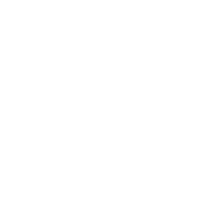

In [7]:
o = deeplabcut.evaluate_network(config, Shuffles=[1], plotting=True)

In [10]:
scm = deeplabcut.extract_save_all_maps(config, shuffle=1, Indices=[0, 5])

/camp/home/blota/.conda/envs/dlc_nogui/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Analyzing data...


2it [00:00,  5.79it/s]


Saving plots...


100%|██████████| 2/2 [00:00<00:00,  3.00it/s]
